In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df=pd.read_csv('Classified Data')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [77]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [78]:
df.corr()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
Unnamed: 0,1.000000,0.012981,-0.038424,0.005651,0.058392,0.011102,-0.000945,-0.036872,-0.014241,0.020570,0.007118,0.022593
WTT,0.012981,1.000000,-0.235255,-0.301018,-0.101517,-0.083401,-0.183628,-0.148100,-0.330977,0.324981,-0.073889,0.551394
PTI,-0.038424,-0.235255,1.000000,0.271908,0.001580,0.097322,0.173701,0.095060,0.246387,-0.266242,0.035834,-0.468748
EQW,0.005651,-0.301018,0.271908,1.000000,-0.040291,0.144539,0.182021,0.059533,0.323857,-0.324656,0.126143,-0.598120
SBI,0.058392,-0.101517,0.001580,-0.040291,1.000000,-0.007983,0.022026,-0.007666,0.037767,0.078032,0.145045,0.028874
LQE,0.011102,-0.083401,0.097322,0.144539,-0.007983,1.000000,0.049944,0.035750,0.083734,-0.143929,0.044496,-0.205043
QWG,-0.000945,-0.183628,0.173701,0.182021,0.022026,0.049944,1.000000,0.098062,0.199189,-0.181809,0.036078,-0.327664
FDJ,-0.036872,-0.148100,0.095060,0.059533,-0.007666,0.035750,0.098062,1.000000,0.122888,-0.116969,-0.012923,-0.214885
PJF,-0.014241,-0.330977,0.246387,0.323857,0.037767,0.083734,0.199189,0.122888,1.000000,-0.363736,0.028012,-0.571483
HQE,0.020570,0.324981,-0.266242,-0.324656,0.078032,-0.143929,-0.181809,-0.116969,-0.363736,1.000000,-0.129283,0.643989


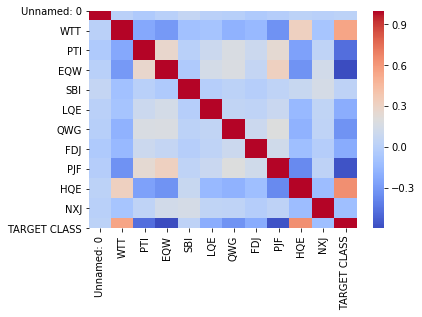

In [79]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [80]:
df.drop(['Unnamed: 0','SBI', 'NXJ'], axis=1, inplace=True)

In [81]:
df.head()

,WTT,PTI,EQW,LQE,QWG,FDJ,PJF,HQE,TARGET CLASS
0,0.913917,1.162073,0.567946,0.780862,0.352608,0.759697,0.643798,0.879422,1
1,0.635632,1.003722,0.535342,0.924109,0.648450,0.675334,1.013546,0.621552,0
2,0.721360,1.201493,0.921990,1.526629,0.720781,1.626351,1.154483,0.957877,0
3,1.234204,1.386726,0.653046,1.142504,0.875128,1.409708,1.380003,1.522692,1
4,1.279491,0.949750,0.627280,1.232537,0.703727,1.115596,0.646691,1.463812,1


In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
ss=StandardScaler()

In [84]:
scaled_array=ss.fit_transform(df.drop('TARGET CLASS', axis=1))

In [85]:
scaled_array.shape

(1000, 8)

In [86]:
x=pd.DataFrame(data= scaled_array, columns=df.columns[:-1])

In [87]:
y=df['TARGET CLASS']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [90]:
x_train.shape

(700, 8)

In [91]:
x_test.shape

(300, 8)

In [92]:
y_train.shape

(700,)

In [93]:
y_test.shape

(300,)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn=KNeighborsClassifier(n_neighbors=1)

In [96]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [97]:
ypred=knn.predict(x_test)

In [98]:
np.mean(y_test!=ypred)

0.09

In [99]:
error=[]
for i in range (1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    ypred=knn.predict(x_test)
    error.append(np.mean(y_test!=ypred))

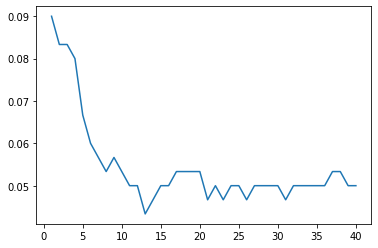

In [100]:
plt.plot(range(1,41), error)

In [101]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
ypred=knn.predict(x_test)
error.append(np.mean(y_test!=ypred))

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
confusion_matrix(y_test, ypred)

array([[142,  11],
       [  4, 143]], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(y_test,ypred)

0.95